In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"..\synthetic data\nights_features.csv",index_col=0)


In [3]:
df.columns

Index(['REGON', 'OKRES', 'RO', 'WON', 'POW', 'GMN', 'KKR', 'D8R01', 'D8R02',
       'D8R2', 'year', 'month', 'date', 'quarter', 'D8R2_mean_gmn',
       'D8R2_mean_pow', 'D8R2_mean_won', 'D8R2_quarter_mean', 'mean_3m',
       'mean_6m', 'mean_9m', 'mean_12m'],
      dtype='object')

In [4]:
# --- 1. Columns to exclude from the model ---
cols_to_drop = ['REGON','D8R1', 'WON', 'POW', 'GMN', 'D8R01', 'D8R02','date']

In [5]:
# --- 2. List to store summary results ---
results = []


MODEL FOR KKR = 276
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 32
Tree depth: 5
Mean Squared Error (MSE): 379.06
R²: 0.998


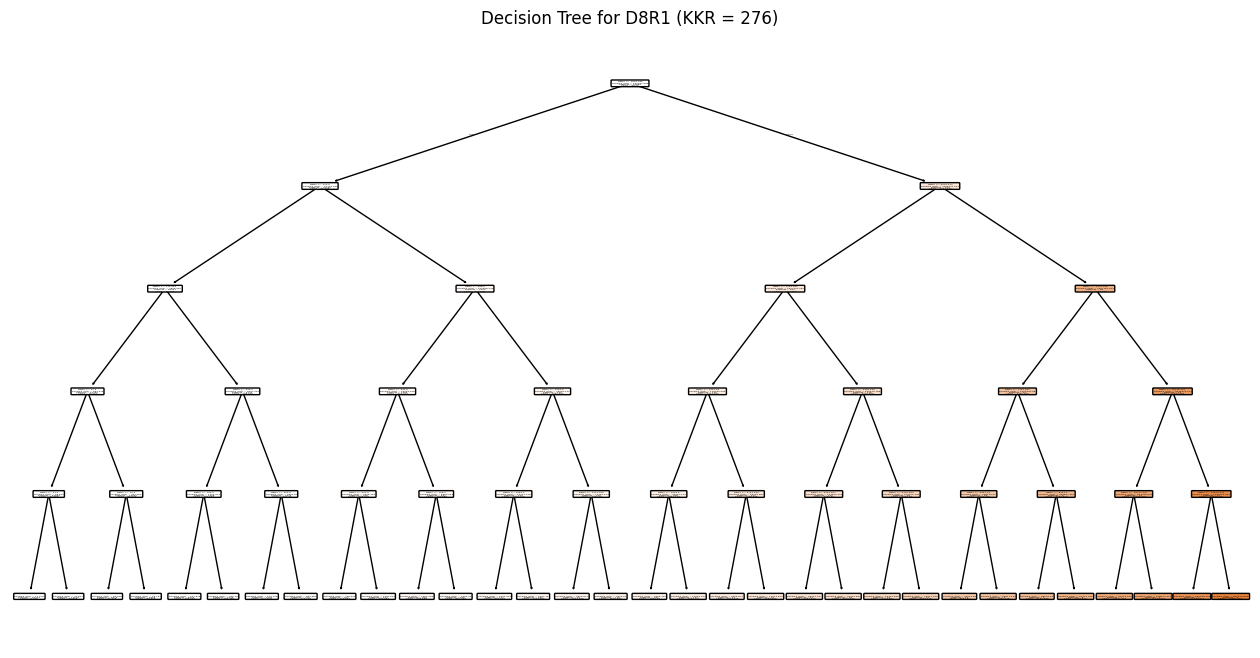


MODEL FOR KKR = 380
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 30
Tree depth: 5
Mean Squared Error (MSE): 72.67
R²: 0.995


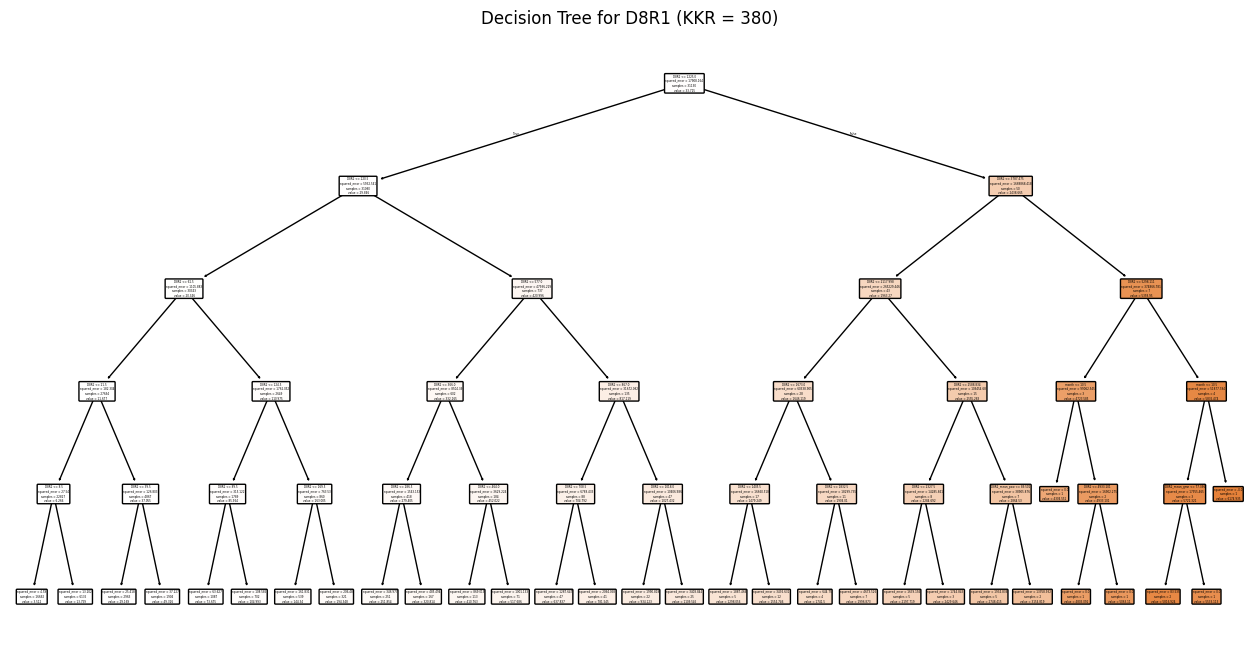


MODEL FOR KKR = 804
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 31
Tree depth: 5
Mean Squared Error (MSE): 659.60
R²: 0.987


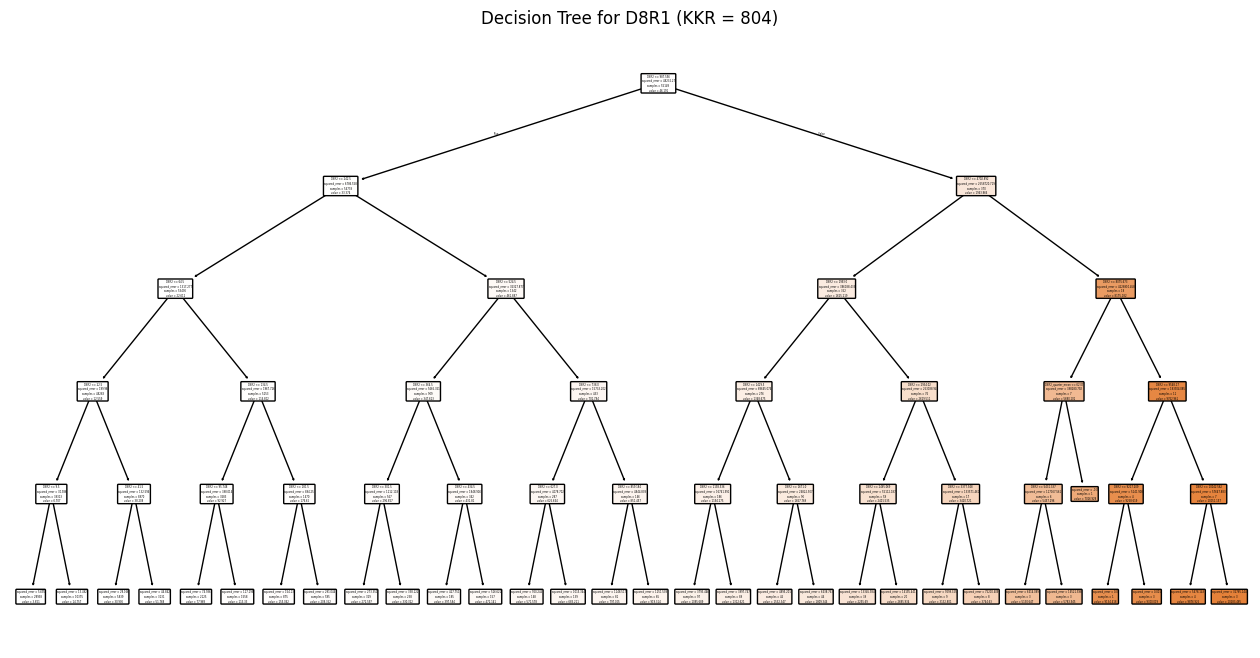


MODEL FOR KKR = 826
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 32
Tree depth: 5
Mean Squared Error (MSE): 2656.10
R²: 0.940


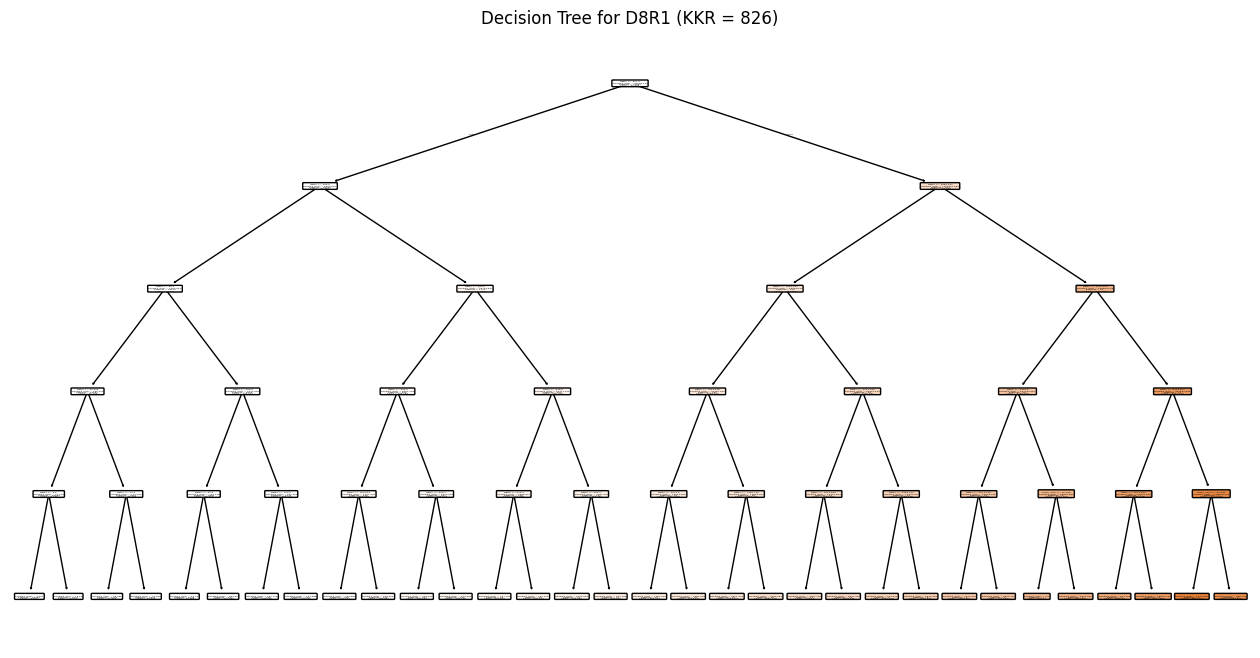


MODEL FOR KKR = 840
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 27
Tree depth: 5
Mean Squared Error (MSE): 833.75
R²: 0.982


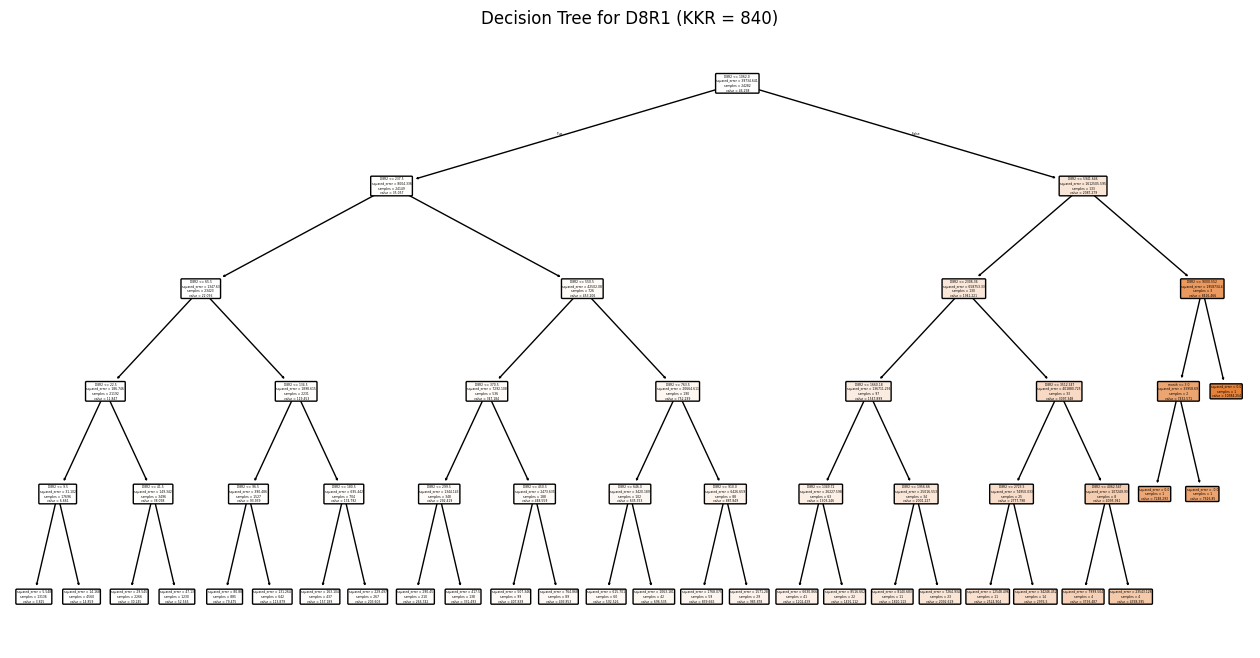


=== SUMMARY OF DECISION TREE MODELS BY KKR ===
   KKR  n_leaves  depth      MSE     R2
0  276        32      5   379.06  0.998
1  380        30      5    72.67  0.995
2  804        31      5   659.60  0.987
3  826        32      5  2656.10  0.940
4  840        27      5   833.75  0.982


In [6]:

# --- 3. Loop through each unique KKR value ---
for kkr_value in df['KKR'].unique():
    print(f"\n{'='*40}")
    print(f"MODEL FOR KKR = {kkr_value}")
    print(f"{'='*40}")
    
    # Filter data for a specific KKR
    df_kkr = df[df['KKR'] == kkr_value].copy()
    
    # --- Remove missing values in the dependent variable ---
    df_kkr = df_kkr.dropna(subset=['D8R2'])
    
    # Skip if there are too few records
    if len(df_kkr) < 10:
        print("Too few observations – skipping.")
        continue

    # Define independent (X) and dependent (y) variables
    X = df_kkr.drop(columns=cols_to_drop, errors='ignore')
    y = df_kkr['D8R2']

    # Remove missing values in features
    X = X.dropna(axis=0)
    y = y.loc[X.index]

    if len(X) < 5:
        print("Too few data points after cleaning – skipping.")
        continue

    # --- 4. Split into training and test sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # --- 5. Build the decision tree model ---
    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # --- 6. Predictions and evaluation ---
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # --- 7. Print model parameters and results ---
    print("Model parameters:")
    print(model.get_params())
    print(f"Number of leaves: {model.get_n_leaves()}")
    print(f"Tree depth: {model.get_depth()}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R²: {r2:.3f}")

    # --- 8. Save model summary for later analysis ---
    results.append({
        'KKR': kkr_value,
        'n_leaves': model.get_n_leaves(),
        'depth': model.get_depth(),
        'MSE': round(mse, 2),
        'R2': round(r2, 3)
    })

    # --- 9. Plot the decision tree ---
    plt.figure(figsize=(16, 8))
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree for D8R1 (KKR = {kkr_value})")
    plt.show()

# --- 10. Display summary table ---
results_df = pd.DataFrame(results)
print("\n=== SUMMARY OF DECISION TREE MODELS BY KKR ===")
print(results_df)


The trees are predicting the number of nights foreign tourists spend in each KKR region.

With R² values between 0.94 and 0.998, the model is explaining almost all variation in the data — meaning the features you kept (excluding WON, POW, GMN, D8R01, D8R02) are very informative for predicting tourist stays.

MSE values indicate the average squared deviation of predicted nights from actual nights. For example:

KKR 380 has MSE ≈ 72.67 → very small errors, predictions are almost exact.

KKR 826 has MSE ≈ 2656 → larger deviations, meaning some tourists stay much longer or shorter than predicted.

Number of leaves (~30) and tree depth 5 → the trees are splitting the data into ~30 groups of tourists with similar night-stay patterns, which makes the model granular but not overly complex.